## Spark Cheatsheet by DataCamp

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1625837623/PySpark_Cheat_Sheet-_Spark_in_Python_owornh.png)

**RDD:**
https://www.datacamp.com/community/blog/pyspark-cheat-sheet-python 

**DataFrame:**
https://www.datacamp.com/community/blog/pyspark-sql-cheat-sheet

### Load Data

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
spark

In [2]:
df = spark.read.csv('../data/online_retail_II.csv', header=True, inferSchema=True)
df

DataFrame[Invoice: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: string, Price: double, Customer ID: int, Country: string]

In [3]:
df.show()

+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|12/01/09 07:45| 6.95|      13085|United Kingdom|
| 489434|   79323P|  PINK CHERRY LIGHTS|      12|12/01/09 07:45| 6.75|      13085|United Kingdom|
| 489434|   79323W| WHITE CHERRY LIGHTS|      12|12/01/09 07:45| 6.75|      13085|United Kingdom|
| 489434|    22041|"RECORD FRAME 7""...|      48|12/01/09 07:45|  2.1|      13085|United Kingdom|
| 489434|    21232|STRAWBERRY CERAMI...|      24|12/01/09 07:45| 1.25|      13085|United Kingdom|
| 489434|    22064|PINK DOUGHNUT TRI...|      24|12/01/09 07:45| 1.65|      13085|United Kingdom|
| 489434|    21871| SAVE THE PLANET MUG|      24|12/01/09 07:45| 1.25|      13085|United Kingdom|
| 489434|    21523|F

In [4]:
df.show(5)

+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|12/01/09 07:45| 6.95|      13085|United Kingdom|
| 489434|   79323P|  PINK CHERRY LIGHTS|      12|12/01/09 07:45| 6.75|      13085|United Kingdom|
| 489434|   79323W| WHITE CHERRY LIGHTS|      12|12/01/09 07:45| 6.75|      13085|United Kingdom|
| 489434|    22041|"RECORD FRAME 7""...|      48|12/01/09 07:45|  2.1|      13085|United Kingdom|
| 489434|    21232|STRAWBERRY CERAMI...|      24|12/01/09 07:45| 1.25|      13085|United Kingdom|
+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
only showing top 5 rows



### Data Profiling

In [5]:
df.columns

['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'Country']

In [6]:
df.dtypes

[('Invoice', 'string'),
 ('StockCode', 'string'),
 ('Description', 'string'),
 ('Quantity', 'int'),
 ('InvoiceDate', 'string'),
 ('Price', 'double'),
 ('Customer ID', 'int'),
 ('Country', 'string')]

In [7]:
df.printSchema()

root
 |-- Invoice: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Customer ID: integer (nullable = true)
 |-- Country: string (nullable = true)



In [8]:
df.count()

525461

In [9]:
df.describe().show()

+-------+-----------------+------------------+--------------------+------------------+--------------+------------------+------------------+-----------+
|summary|          Invoice|         StockCode|         Description|          Quantity|   InvoiceDate|             Price|       Customer ID|    Country|
+-------+-----------------+------------------+--------------------+------------------+--------------+------------------+------------------+-----------+
|  count|           525461|            525461|              522533|            525461|        525461|            525461|            417534|     525461|
|   mean|514496.9241788484| 30518.37992495103|  22226.666666666668|10.337667305470815|          null| 4.688834478677593|15360.645477973052|       null|
| stddev|14439.20949446514|20693.168152854687|   646.8974674037095|107.42411026879768|          null|146.12691395292683|1680.8113157457158|       null|
|    min|           489434|             10002|  DOORMAT UNION J...|             -9600|01

In [10]:
df.summary().show()

+-------+-----------------+------------------+--------------------+------------------+--------------+------------------+------------------+-----------+
|summary|          Invoice|         StockCode|         Description|          Quantity|   InvoiceDate|             Price|       Customer ID|    Country|
+-------+-----------------+------------------+--------------------+------------------+--------------+------------------+------------------+-----------+
|  count|           525461|            525461|              522533|            525461|        525461|            525461|            417534|     525461|
|   mean|514496.9241788484| 30518.37992495103|  22226.666666666668|10.337667305470815|          null| 4.688834478677593|15360.645477973052|       null|
| stddev|14439.20949446514|20693.168152854687|   646.8974674037095|107.42411026879768|          null|146.12691395292683|1680.8113157457158|       null|
|    min|           489434|             10002|  DOORMAT UNION J...|             -9600|01

### EDA - Exploratory Data Analysis

In [11]:
df.select('Quantity', 'Price').show()

+--------+-----+
|Quantity|Price|
+--------+-----+
|      12| 6.95|
|      12| 6.75|
|      12| 6.75|
|      48|  2.1|
|      24| 1.25|
|      24| 1.65|
|      24| 1.25|
|      10| 5.95|
|      12| 2.55|
|      12| 3.75|
|      24| 1.65|
|      12| 2.55|
|      10| 5.95|
|      18| 5.45|
|       3| 5.95|
|      16| 1.69|
|       3| 6.95|
|      12| 1.45|
|      12| 1.65|
|      12| 1.65|
+--------+-----+
only showing top 20 rows



In [12]:
df.select('Quantity').summary().show()

+-------+------------------+
|summary|          Quantity|
+-------+------------------+
|  count|            525461|
|   mean|10.337667305470815|
| stddev|107.42411026879768|
|    min|             -9600|
|    25%|                 1|
|    50%|                 3|
|    75%|                10|
|    max|             19152|
+-------+------------------+



In [13]:
df.show()

+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|12/01/09 07:45| 6.95|      13085|United Kingdom|
| 489434|   79323P|  PINK CHERRY LIGHTS|      12|12/01/09 07:45| 6.75|      13085|United Kingdom|
| 489434|   79323W| WHITE CHERRY LIGHTS|      12|12/01/09 07:45| 6.75|      13085|United Kingdom|
| 489434|    22041|"RECORD FRAME 7""...|      48|12/01/09 07:45|  2.1|      13085|United Kingdom|
| 489434|    21232|STRAWBERRY CERAMI...|      24|12/01/09 07:45| 1.25|      13085|United Kingdom|
| 489434|    22064|PINK DOUGHNUT TRI...|      24|12/01/09 07:45| 1.65|      13085|United Kingdom|
| 489434|    21871| SAVE THE PLANET MUG|      24|12/01/09 07:45| 1.25|      13085|United Kingdom|
| 489434|    21523|F

In [14]:
df.select('Quantity').summary().collect()

[Row(summary='count', Quantity='525461'),
 Row(summary='mean', Quantity='10.337667305470815'),
 Row(summary='stddev', Quantity='107.42411026879768'),
 Row(summary='min', Quantity='-9600'),
 Row(summary='25%', Quantity='1'),
 Row(summary='50%', Quantity='3'),
 Row(summary='75%', Quantity='10'),
 Row(summary='max', Quantity='19152')]

In [15]:
df.select('Quantity').summary().collect()[5]['Quantity']

'3'

In [16]:
df.filter( df['Quantity'] < 0 ).show()

+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
|C489449|    22087|PAPER BUNTING WHI...|     -12|12/01/09 10:33| 2.95|      16321|     Australia|
|C489449|   85206A|CREAM FELT EASTER...|      -6|12/01/09 10:33| 1.65|      16321|     Australia|
|C489449|    21895|POTTING SHED SOW ...|      -4|12/01/09 10:33| 4.25|      16321|     Australia|
|C489449|    21896|  POTTING SHED TWINE|      -6|12/01/09 10:33|  2.1|      16321|     Australia|
|C489449|    22083|PAPER CHAIN KIT R...|     -12|12/01/09 10:33| 2.95|      16321|     Australia|
|C489449|    21871| SAVE THE PLANET MUG|     -12|12/01/09 10:33| 1.25|      16321|     Australia|
|C489449|    84946|ANTIQUE SILVER TE...|     -12|12/01/09 10:33| 1.25|      16321|     Australia|
|C489449|   84970S|H

In [17]:
df.where( df['Quantity'] < 0 ).show()

+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
|C489449|    22087|PAPER BUNTING WHI...|     -12|12/01/09 10:33| 2.95|      16321|     Australia|
|C489449|   85206A|CREAM FELT EASTER...|      -6|12/01/09 10:33| 1.65|      16321|     Australia|
|C489449|    21895|POTTING SHED SOW ...|      -4|12/01/09 10:33| 4.25|      16321|     Australia|
|C489449|    21896|  POTTING SHED TWINE|      -6|12/01/09 10:33|  2.1|      16321|     Australia|
|C489449|    22083|PAPER CHAIN KIT R...|     -12|12/01/09 10:33| 2.95|      16321|     Australia|
|C489449|    21871| SAVE THE PLANET MUG|     -12|12/01/09 10:33| 1.25|      16321|     Australia|
|C489449|    84946|ANTIQUE SILVER TE...|     -12|12/01/09 10:33| 1.25|      16321|     Australia|
|C489449|   84970S|H

In [18]:
# TODO: 1. Quantity 50 - 120
df.filter((df['Quantity'] > 50) & (df['Quantity'] < 120)).show()

+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
| 489438|    20711|     JUMBO BAG TOYS |      60|12/01/09 09:24|  1.3|      18102|United Kingdom|
| 489438|   84031A|CHARLIE+LOLA RED ...|      56|12/01/09 09:24|  3.0|      18102|United Kingdom|
| 489438|   84031B|CHARLIE LOLA BLUE...|      56|12/01/09 09:24|  3.0|      18102|United Kingdom|
| 489438|   84032A|CHARLIE+LOLA PINK...|      60|12/01/09 09:24|  1.9|      18102|United Kingdom|
| 489438|   84032B|CHARLIE + LOLA RE...|      56|12/01/09 09:24|  1.9|      18102|United Kingdom|
| 489438|   84519A|TOMATO CHARLIE+LO...|      56|12/01/09 09:24| 2.15|      18102|United Kingdom|
| 489438|   84519B|CARROT CHARLIE+LO...|      60|12/01/09 09:24|  2.4|      18102|United Kingdom|
| 489438|   85132A|C

In [19]:
df.filter(df['Quantity'].between(50, 120)).show()

+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
| 489438|    20711|     JUMBO BAG TOYS |      60|12/01/09 09:24|  1.3|      18102|United Kingdom|
| 489438|   84031A|CHARLIE+LOLA RED ...|      56|12/01/09 09:24|  3.0|      18102|United Kingdom|
| 489438|   84031B|CHARLIE LOLA BLUE...|      56|12/01/09 09:24|  3.0|      18102|United Kingdom|
| 489438|   84032A|CHARLIE+LOLA PINK...|      60|12/01/09 09:24|  1.9|      18102|United Kingdom|
| 489438|   84032B|CHARLIE + LOLA RE...|      56|12/01/09 09:24|  1.9|      18102|United Kingdom|
| 489438|   84519A|TOMATO CHARLIE+LO...|      56|12/01/09 09:24| 2.15|      18102|United Kingdom|
| 489438|   84519B|CARROT CHARLIE+LO...|      60|12/01/09 09:24|  2.4|      18102|United Kingdom|
| 489438|   85132A|C

In [20]:
# TODO: 2. Price 0.1 - 0.5
df.filter(df['Price'].between(0.1, 0.5)).show()

+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
| 489439|   16161P|  WRAP ENGLISH ROSE |      25|12/01/09 09:28| 0.42|      12682|        France|
| 489439|   16169N|WRAP BLUE RUSSIAN...|      25|12/01/09 09:28| 0.42|      12682|        France|
| 489442|   84251J|GREETING CARD, TH...|      12|12/01/09 09:46| 0.42|      13635|United Kingdom|
| 489442|    22024|RAINY LADIES BIRT...|      12|12/01/09 09:46| 0.42|      13635|United Kingdom|
| 489442|    22026|BANQUET BIRTHDAY ...|      12|12/01/09 09:46| 0.42|      13635|United Kingdom|
| 489442|    22029|SPACE BOY BIRTHDA...|      12|12/01/09 09:46| 0.42|      13635|United Kingdom|
| 489442|    22025|RING OF ROSES BIR...|      12|12/01/09 09:46| 0.42|      13635|United Kingdom|
| 489442|    22031|B

In [21]:
# TODO: 3. Quantity 50 - 120 and UnitPrice 0.1 - 0.5
df.filter(df['Quantity'].between(50, 120) & df['Price'].between(0.1, 0.5)).show()

+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+--------------+-----+-----------+--------------+
| 489532|    16235|RECYCLED PENCIL W...|      60|12/01/09 11:58| 0.21|      13394|United Kingdom|
| 489539|    21500|   PINK SPOTS  WRAP |     100|12/01/09 12:18| 0.34|      15061|United Kingdom|
| 489560|   16161C|  WRAP SPEED DEMONS |     100|12/01/09 12:56|  0.1|      13526|United Kingdom|
| 489560|    84270|ASSTD DESIGN BUBB...|      90|12/01/09 12:56| 0.21|      13526|United Kingdom|
| 489560|    35955|SMALL FOLKART CHR...|      96|12/01/09 12:56| 0.19|      13526|United Kingdom|
| 489575|    35957|SMALLFOLKART BAUB...|      96|12/01/09 01:37| 0.19|      13590|United Kingdom|
| 489581|    85175|CACTI T-LIGHT CAN...|      64|12/01/09 01:47| 0.42|      15945|United Kingdom|
| 489640|    10120| 

### Graphical EDA

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
df_pd = df.toPandas()
df_pd.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/01/09 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/01/09 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/01/09 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"""RECORD FRAME 7"""" SINGLE SIZE """,48,12/01/09 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/01/09 07:45,1.25,13085.0,United Kingdom


In [24]:
df_pd_500row = df_pd[0:500]

<AxesSubplot:xlabel='Price'>

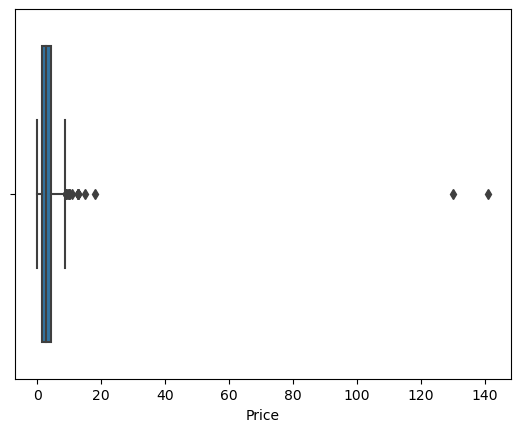

In [25]:
sns.boxplot(x=df_pd_500row['Price'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

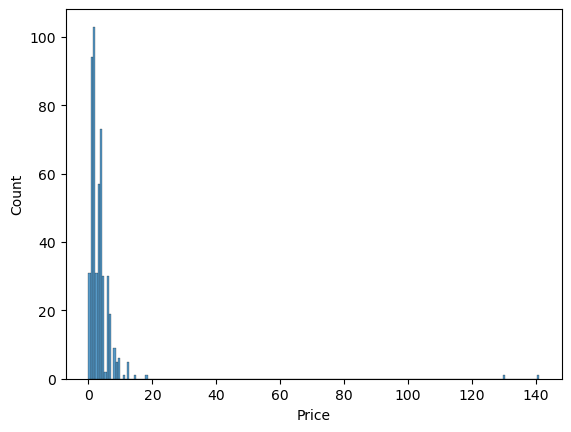

In [26]:
sns.histplot(data=df_pd_500row['Price'])

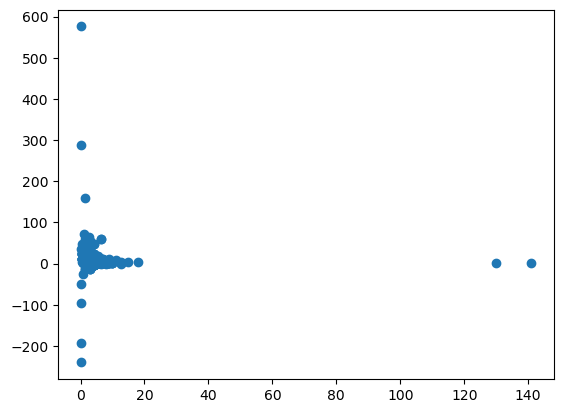

In [27]:
plt.scatter(x=df_pd_500row['Price'], y=df_pd_500row['Quantity'])

### Rename Column

In [28]:
df.columns

['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'Country']

In [29]:
df = df.withColumnRenamed('Price', 'GBPPrice')

In [30]:
df.columns

['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'GBPPrice',
 'Customer ID',
 'Country']

### Convert dtype

In [31]:
df.dtypes

[('Invoice', 'string'),
 ('StockCode', 'string'),
 ('Description', 'string'),
 ('Quantity', 'int'),
 ('InvoiceDate', 'string'),
 ('GBPPrice', 'double'),
 ('Customer ID', 'int'),
 ('Country', 'string')]

In [32]:
# InvoiceDate string -> timestamp
from pyspark.sql.functions import to_timestamp

df = df.withColumn('InvoiceDateTime', to_timestamp(col='InvoiceDate', format='dd/MM/yy HH:mm'))
df.show()

+-------+---------+--------------------+--------+--------------+--------+-----------+--------------+-------------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|GBPPrice|Customer ID|       Country|    InvoiceDateTime|
+-------+---------+--------------------+--------+--------------+--------+-----------+--------------+-------------------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|12/01/09 07:45|    6.95|      13085|United Kingdom|2009-01-12 07:45:00|
| 489434|   79323P|  PINK CHERRY LIGHTS|      12|12/01/09 07:45|    6.75|      13085|United Kingdom|2009-01-12 07:45:00|
| 489434|   79323W| WHITE CHERRY LIGHTS|      12|12/01/09 07:45|    6.75|      13085|United Kingdom|2009-01-12 07:45:00|
| 489434|    22041|"RECORD FRAME 7""...|      48|12/01/09 07:45|     2.1|      13085|United Kingdom|2009-01-12 07:45:00|
| 489434|    21232|STRAWBERRY CERAMI...|      24|12/01/09 07:45|    1.25|      13085|United Kingdom|2009-01-12 07:45:00|
| 489434|    22064|PINK DOUGHNUT

In [33]:
df.printSchema()

root
 |-- Invoice: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- GBPPrice: double (nullable = true)
 |-- Customer ID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- InvoiceDateTime: timestamp (nullable = true)



### Anomalies Check
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

In [34]:
df.select('Stockcode').distinct().show()

+---------+
|Stockcode|
+---------+
|    21248|
|    22121|
|    21889|
|    22254|
|   84899F|
|    21249|
|    21259|
|   90197B|
|    21894|
|    90022|
|    21331|
|    20868|
|   90210B|
|   90177A|
|    90143|
|   72752D|
|    22130|
|    21671|
|    21711|
|    21535|
+---------+
only showing top 20 rows



In [35]:
df.filter(df['Stockcode'].rlike('[A-Z]+')).show(5)

+-------+---------+--------------------+--------+--------------+--------+-----------+--------------+-------------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|GBPPrice|Customer ID|       Country|    InvoiceDateTime|
+-------+---------+--------------------+--------+--------------+--------+-----------+--------------+-------------------+
| 489434|   79323P|  PINK CHERRY LIGHTS|      12|12/01/09 07:45|    6.75|      13085|United Kingdom|2009-01-12 07:45:00|
| 489434|   79323W| WHITE CHERRY LIGHTS|      12|12/01/09 07:45|    6.75|      13085|United Kingdom|2009-01-12 07:45:00|
| 489436|   48173C|DOOR MAT BLACK FL...|      10|12/01/09 09:06|    5.95|      13078|United Kingdom|2009-01-12 09:06:00|
| 489436|   35004B|SET OF 3 BLACK FL...|      12|12/01/09 09:06|    4.65|      13078|United Kingdom|2009-01-12 09:06:00|
| 489436|   84596F|SMALL MARSHMALLOW...|       8|12/01/09 09:06|    1.25|      13078|United Kingdom|2009-01-12 09:06:00|
+-------+---------+-------------

In [36]:
df.filter(df['Stockcode'].rlike('[a-z]+')).show(5)

+-------+---------+--------------------+--------+--------------+--------+-----------+--------------+-------------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|GBPPrice|Customer ID|       Country|    InvoiceDateTime|
+-------+---------+--------------------+--------+--------------+--------+-----------+--------------+-------------------+
| 489600|   72349b|SET/6 PURPLE BUTT...|       2|12/01/09 02:43|     4.3|       null|United Kingdom|2009-01-12 02:43:00|
| 489600|   72529w| WHITE ADVENT CANDLE|       1|12/01/09 02:43|     4.3|       null|United Kingdom|2009-01-12 02:43:00|
| 489600|   72807c|SET/3 VANILLA SCE...|       1|12/01/09 02:43|    8.65|       null|United Kingdom|2009-01-12 02:43:00|
| 489600|   84797b|BLUE SAVANNAH PIC...|       1|12/01/09 02:43|   11.26|       null|United Kingdom|2009-01-12 02:43:00|
| 489601|   84872a|TEATIME FUNKY FLO...|       1|12/01/09 02:44|   11.26|       null|United Kingdom|2009-01-12 02:44:00|
+-------+---------+-------------

In [37]:
from pyspark.sql.functions import regexp_replace

df = df.withColumn('StockCode', regexp_replace(df['Stockcode'], r'[A-Za-z]', ''))

In [38]:
df.filter(df['Stockcode'].rlike('[A-Za-z]+')).show()

+-------+---------+-----------+--------+-----------+--------+-----------+-------+---------------+
|Invoice|StockCode|Description|Quantity|InvoiceDate|GBPPrice|Customer ID|Country|InvoiceDateTime|
+-------+---------+-----------+--------+-----------+--------+-----------+-------+---------------+
+-------+---------+-----------+--------+-----------+--------+-----------+-------+---------------+



### Missing values

In [39]:
for c in df.columns:
    print(c)

Invoice
StockCode
Description
Quantity
InvoiceDate
GBPPrice
Customer ID
Country
InvoiceDateTime


In [40]:
from pyspark.sql.functions import sum, col

sum(col('Description').isNull()).cast('int')

Column<'CAST(sum((Description IS NULL)) AS INT)'>

In [41]:
[sum(col(c).isNull().cast('int')).alias(c) for c in df.columns]

[Column<'sum(CAST((Invoice IS NULL) AS INT)) AS Invoice'>,
 Column<'sum(CAST((StockCode IS NULL) AS INT)) AS StockCode'>,
 Column<'sum(CAST((Description IS NULL) AS INT)) AS Description'>,
 Column<'sum(CAST((Quantity IS NULL) AS INT)) AS Quantity'>,
 Column<'sum(CAST((InvoiceDate IS NULL) AS INT)) AS InvoiceDate'>,
 Column<'sum(CAST((GBPPrice IS NULL) AS INT)) AS GBPPrice'>,
 Column<'sum(CAST((Customer ID IS NULL) AS INT)) AS `Customer ID`'>,
 Column<'sum(CAST((Country IS NULL) AS INT)) AS Country'>,
 Column<'sum(CAST((InvoiceDateTime IS NULL) AS INT)) AS InvoiceDateTime'>]

In [42]:
df.select([sum(col(c).isNull().cast('int')).alias(c) for c in df.columns]).show()

+-------+---------+-----------+--------+-----------+--------+-----------+-------+---------------+
|Invoice|StockCode|Description|Quantity|InvoiceDate|GBPPrice|Customer ID|Country|InvoiceDateTime|
+-------+---------+-----------+--------+-----------+--------+-----------+-------+---------------+
|      0|        0|       2928|       0|          0|       0|     107927|      0|         307243|
+-------+---------+-----------+--------+-----------+--------+-----------+-------+---------------+



In [43]:
df.filter(df['Customer ID'].isNull()).show()

+-------+---------+--------------------+--------+--------------+--------+-----------+--------------+-------------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|GBPPrice|Customer ID|       Country|    InvoiceDateTime|
+-------+---------+--------------------+--------+--------------+--------+-----------+--------------+-------------------+
| 489464|    21733|        85123a mixed|     -96|12/01/09 10:52|     0.0|       null|United Kingdom|2009-01-12 10:52:00|
| 489463|    71477|               short|    -240|12/01/09 10:52|     0.0|       null|United Kingdom|2009-01-12 10:52:00|
| 489467|    85123|         21733 mixed|    -192|12/01/09 10:53|     0.0|       null|United Kingdom|2009-01-12 10:53:00|
| 489521|    21646|                null|     -50|12/01/09 11:44|     0.0|       null|United Kingdom|2009-01-12 11:44:00|
| 489525|    85226|BLUE PULL BACK RA...|       1|12/01/09 11:49|    0.55|       null|United Kingdom|2009-01-12 11:49:00|
| 489525|    85227|SET/6 3D KIT 

In [44]:
from pyspark.sql.functions import when

df = df.withColumn('Customer ID', when(df['Customer ID'].isNull(), -1).otherwise(df['Customer ID']))

In [45]:
df.filter(df['Customer ID'].isNull()).show()

+-------+---------+-----------+--------+-----------+--------+-----------+-------+---------------+
|Invoice|StockCode|Description|Quantity|InvoiceDate|GBPPrice|Customer ID|Country|InvoiceDateTime|
+-------+---------+-----------+--------+-----------+--------+-----------+-------+---------------+
+-------+---------+-----------+--------+-----------+--------+-----------+-------+---------------+



### SQL

In [46]:
df.createOrReplaceTempView('sales')

In [47]:
spark.sql('SELECT * FROM sales limit 5;').show()

+-------+---------+--------------------+--------+--------------+--------+-----------+--------------+-------------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|GBPPrice|Customer ID|       Country|    InvoiceDateTime|
+-------+---------+--------------------+--------+--------------+--------+-----------+--------------+-------------------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|12/01/09 07:45|    6.95|      13085|United Kingdom|2009-01-12 07:45:00|
| 489434|    79323|  PINK CHERRY LIGHTS|      12|12/01/09 07:45|    6.75|      13085|United Kingdom|2009-01-12 07:45:00|
| 489434|    79323| WHITE CHERRY LIGHTS|      12|12/01/09 07:45|    6.75|      13085|United Kingdom|2009-01-12 07:45:00|
| 489434|    22041|"RECORD FRAME 7""...|      48|12/01/09 07:45|     2.1|      13085|United Kingdom|2009-01-12 07:45:00|
| 489434|    21232|STRAWBERRY CERAMI...|      24|12/01/09 07:45|    1.25|      13085|United Kingdom|2009-01-12 07:45:00|
+-------+---------+-------------

In [48]:
spark.sql('SELECT count(*) FROM sales').show()

+--------+
|count(1)|
+--------+
|  525461|
+--------+



In [49]:
spark.sql('SELECT count(*) as cnt_row, country FROM sales GROUP BY Country ORDER BY cnt_row DESC').show()

+-------+--------------------+
|cnt_row|             country|
+-------+--------------------+
| 485852|      United Kingdom|
|   9670|                EIRE|
|   8129|             Germany|
|   5772|              France|
|   2769|         Netherlands|
|   1278|               Spain|
|   1187|         Switzerland|
|   1101|            Portugal|
|   1054|             Belgium|
|    906|     Channel Islands|
|    902|              Sweden|
|    731|               Italy|
|    654|           Australia|
|    554|              Cyprus|
|    537|             Austria|
|    517|              Greece|
|    432|United Arab Emirates|
|    428|             Denmark|
|    369|              Norway|
|    354|             Finland|
+-------+--------------------+
only showing top 20 rows



In [50]:
spark.sql("""
SELECT * FROM sales
  WHERE InvoiceDateTime >= '2010-12-01'
  AND GBPPrice > 3.5
  AND Country='USA'
""").show()

+-------+---------+--------------------+--------+--------------+--------+-----------+-------+-------------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|GBPPrice|Customer ID|Country|    InvoiceDateTime|
+-------+---------+--------------------+--------+--------------+--------+-----------+-------+-------------------+
| 494234|         |             POSTAGE|       1|01/12/10 03:01|     5.0|      12549|    USA|2010-12-01 03:01:00|
| 526668|    22372|AIRLINE BAG VINTA...|       4|10/12/10 03:41|    4.25|      12467|    USA|2010-12-10 03:41:00|
+-------+---------+--------------------+--------+--------------+--------+-----------+-------+-------------------+



In [51]:
df.write.csv('cleaned_online_retail_II', header=True)

In [52]:
df.count()

525461

In [53]:
df2 = spark.read.csv('cleaned_online_retail_II/*.csv', header=True, inferSchema = True)

In [54]:
df2.show()

+-------+---------+--------------------+--------+--------------+--------+-----------+--------------+-------------------+
|Invoice|StockCode|         Description|Quantity|   InvoiceDate|GBPPrice|Customer ID|       Country|    InvoiceDateTime|
+-------+---------+--------------------+--------+--------------+--------+-----------+--------------+-------------------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|12/01/09 07:45|    6.95|      13085|United Kingdom|2009-01-12 07:45:00|
| 489434|    79323|  PINK CHERRY LIGHTS|      12|12/01/09 07:45|    6.75|      13085|United Kingdom|2009-01-12 07:45:00|
| 489434|    79323| WHITE CHERRY LIGHTS|      12|12/01/09 07:45|    6.75|      13085|United Kingdom|2009-01-12 07:45:00|
| 489434|    22041|"RECORD FRAME 7""...|      48|12/01/09 07:45|     2.1|      13085|United Kingdom|2009-01-12 07:45:00|
| 489434|    21232|STRAWBERRY CERAMI...|      24|12/01/09 07:45|    1.25|      13085|United Kingdom|2009-01-12 07:45:00|
| 489434|    22064|PINK DOUGHNUT

In [55]:
df2.count()

525461